In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
bus = pd.read_csv('./data/경기도_광주시_버스정류장_08_25_2021.csv', encoding='euc-kr', engine='python')
bus.shape

(998, 23)

In [3]:
bus.head()

,지형지물부호,관리번호,관리기관,행정구역,법정구역,법정동리,도로구간번호,공사번호,설치일자,정류장종류,...,취득구분,취득금액,관리부서,내용연수,쉘터설치유무,설치유무(BIT),온열의자설치유무,비고,경도,위도
0,정류장,92022037,광주시,경안동,역동,NaN,56,,2016-10-01,공용,...,매입,0.0,대중교통과,0.0,NaN,NaN,0.0,,127.253877,37.398346
1,정류장,92022036,광주시,경안동,역동,NaN,160431,,2016-10-01,공용,...,매입,0.0,대중교통과,0.0,NaN,NaN,NaN,,127.253232,37.397400
2,정류장,92022035,광주시,곤지암읍,곤지암읍,NaN,262355,,2016-01-01,공용,...,매입,0.0,대중교통과,0.0,NaN,NaN,NaN,,127.347931,37.349946
3,정류장,92022034,광주시,곤지암읍,곤지암읍,NaN,262355,,2016-01-01,공용,...,매입,0.0,대중교통과,0.0,NaN,NaN,NaN,,127.347834,37.350273
4,정류장,92022033,광주시,오포읍,오포읍,NaN,120993,,2010-01-01,공용,...,매입,0.0,대중교통과,0.0,NaN,NaN,NaN,,127.215960,37.359298


In [4]:
# 중복된 버스정류장 확인
bus.duplicated(['도로구간번호'])

0      False
1      False
2      False
3       True
4      False
       ...  
993    False
994    False
995     True
996    False
997     True
Length: 998, dtype: bool

In [5]:
# 중복된 버스정류장 개수 확인
bus.duplicated(['도로구간번호']).sum()

512

In [6]:
# 중복으로 들어가있는 버스정류장 제거
bus = bus.drop_duplicates('도로구간번호')

In [7]:
# 필요한 column만 사용하기
bus_columns = ['도로구간번호','정류장명', '정류장종류','위도', '경도']
df_bus =  bus[bus_columns]
df_bus

,도로구간번호,정류장명,정류장종류,위도,경도
0,56,경기광주역,공용,37.398346,127.253877
1,160431,"경기광주역,경안천",공용,37.397400,127.253232
2,262355,곤지암역,공용,37.349946,127.347931
4,120993,오포초교 앞,공용,37.359298,127.215960
6,120645,시안공원묘원 정문,공용,37.348245,127.191917
...,...,...,...,...,...
986,325,TAXI 정류장,택시,37.409860,127.258975
990,360298,도마삼거리,공용,37.467551,127.272394
993,160265,목림삼거리,일반버스,37.393171,127.223913
994,396,임시정류장,택시,37.406274,127.260016


In [8]:
df_bus.dtypes

도로구간번호      int64
정류장명       object
정류장종류      object
위도        float64
경도        float64
dtype: object

In [9]:
# 연산에 사용할 데이터가 아니기 때문에 object(문자열)형태로 변경한다.
df_bus['도로구간번호'] = df_bus['도로구간번호'].astype(str)

In [10]:
df_bus.dtypes

도로구간번호     object
정류장명       object
정류장종류      object
위도        float64
경도        float64
dtype: object

In [11]:
# 불필요한 인덱스 제거
df_bus.reset_index(drop=True)

,도로구간번호,정류장명,정류장종류,위도,경도
0,56,경기광주역,공용,37.398346,127.253877
1,160431,"경기광주역,경안천",공용,37.397400,127.253232
2,262355,곤지암역,공용,37.349946,127.347931
3,120993,오포초교 앞,공용,37.359298,127.215960
4,120645,시안공원묘원 정문,공용,37.348245,127.191917
...,...,...,...,...,...
481,325,TAXI 정류장,택시,37.409860,127.258975
482,360298,도마삼거리,공용,37.467551,127.272394
483,160265,목림삼거리,일반버스,37.393171,127.223913
484,396,임시정류장,택시,37.406274,127.260016


In [12]:
# folium을 이용한 지도 시각화
map_bus = folium.Map(location=[df_bus['위도'].mean(), df_bus['경도'].mean()], zoom_start=12)
for i in df_bus.index:
    bus_name = df_bus.loc[i, '정류장명']
    popup = folium.Popup(bus_name, max_width=200)
    folium.Marker(location=[df_bus.loc[i, '위도'], df_bus.loc[i, '경도']], popup=popup).add_to(map_bus)
map_bus.save('./output/bus_map.html')
map_bus

<AxesSubplot:xlabel='경도', ylabel='위도'>

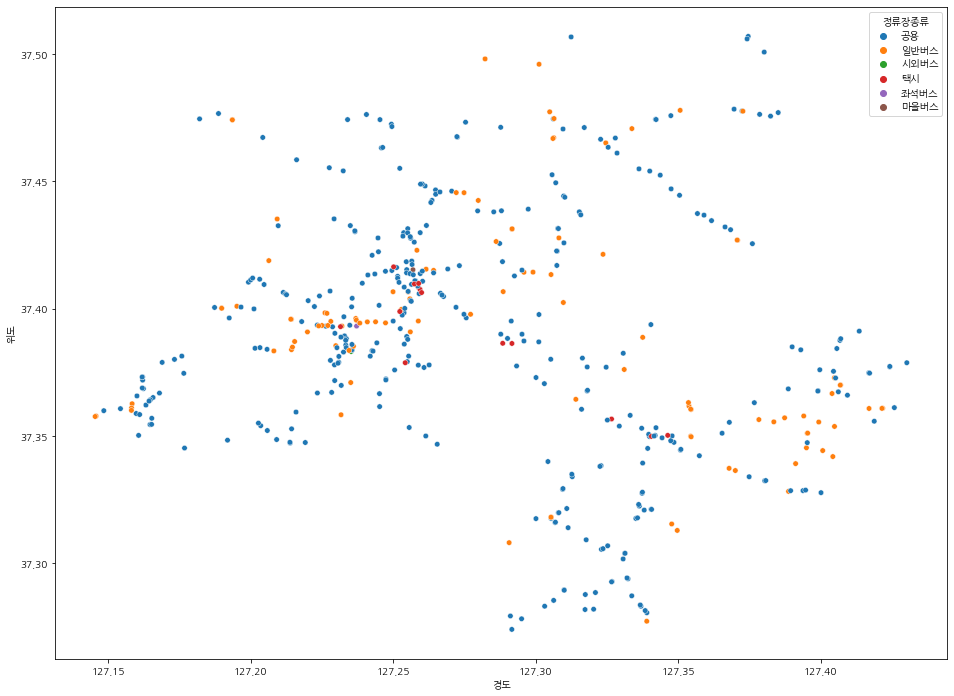

In [13]:
# seaborn을 이용한 시각화
plt.figure(figsize=[16, 12])
sns.scatterplot(data=df_bus, x='경도', y='위도', hue='정류장종류', s=30)